# ADS 509 Sentiment Assignment
## Gonzalo Blazquez

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here
import csv
csv.field_size_limit(10**6) # for big twitter descriptions

import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt_tab to C:\Users\Gonzalo
[nltk_data]     B\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/Gonzalo B/Downloads/AppliedTextMining/Module2/Assign 2/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [4]:
# Read in the lyrics data. From Module 2 Solution
lyrics_data = defaultdict(dict)
for item in os.listdir(data_location + lyrics_folder) :
    if os.path.isdir(data_location + lyrics_folder + item) :
        for lyric_page in os.listdir(data_location + lyrics_folder + item) :
            artist,song = lyric_page.split("_")
            song = song.replace(".txt","")
            lyrics_data[item][song] = open(data_location + lyrics_folder + item + "/" + lyric_page).read()


In [5]:
# Read in the twitter data. From Module 2 Solution
artist_descriptions = {}

for artist_file in os.listdir(os.path.join(data_location, twitter_folder)):
        if artist_file.endswith('.txt'):
                description_path=os.path.join(data_location, twitter_folder, artist_file)
                artist = artist_file.split('_', 1)[0]
                # Read each file as a table to get the values of the description column
                with open(description_path, mode='r', encoding='utf-8') as file:
                        reader = csv.DictReader(file, delimiter='\t')  
                        for row in reader:
                                description = row['description'] 
                                # Only if it has a description it will add it
                                if description:
                                        if artist in artist_descriptions:
                                                artist_descriptions[artist].append(description)
                                        else:
                                                artist_descriptions[artist] = [description]


In [6]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.
pos_score = 1
neg_score = -1
word_dict = {}

with open('positive-words.txt', 'r') as pos_file:
    # Read each line to remove the ones that start with a semicolon
    pos_lines = pos_file.readlines()
    positive = [line.strip() for line in pos_lines if not line.strip().startswith(';') and line.strip()]

    # Adding the positive words to the dictionary
    for word in positive:
        word_dict[word] = pos_score

with open('negative-words.txt', 'r') as neg_file:
    neg_lines = neg_file.readlines()
    negative = [line.strip() for line in neg_lines if not line.strip().startswith(';') and line.strip()]

    # Adding the negative words to the dictionary
    for word in negative:
        word_dict[word] = neg_score

with open('tidytext_sentiments.txt', 'r') as file:
    reader = csv.DictReader(file, delimiter='\t')

    # Get word and sentiment from each row
    for row in reader:
        word = row['word']
        sentiment = row['sentiment']
        
        # Assign scores
        if sentiment == 'positive':
            word_dict[word] = pos_score
        elif sentiment == 'negative':
            word_dict[word] = neg_score

#word_dict

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [7]:
# From the text book 'Blueprints for text analytics using python'.
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score / len(bag_of_words)

In [8]:
# Calculate the sentiment score for each song in the lyrics dictionary
for artist, songs in lyrics_data.items():
    for song, lyrics in songs.items():
        
        score = bing_liu_score(lyrics)
        # Add the scora to the dictionary
        lyrics_data[artist][song] = {'lyrics': lyrics,'score': score}

In [9]:
# Average sentiment per song
for artist, songs in lyrics_data.items():
    score = 0
    num_songs = len(songs)
    
    # Sum and divide by songs number
    for song, data in songs.items():
        score += data['score']
    avg_score = score / num_songs
    # Result for each artist
    print(f"{artist} has an average of {avg_score}")

cher has an average of 0.026857969030950776
robyn has an average of 0.029633638267269283


In [10]:
# Convert to dataframe for easier manipulation
data_list = []
for artist, songs in lyrics_data.items():
    for song, data in songs.items():
        data_list.append({
            'artist': artist,
            'song': song,
            'score': data['score'],
            'lyrics': data['lyrics']
        })
df = pd.DataFrame(data_list)
print(df.head())

  artist                      song     score  \
0   cher                 88degrees  0.027701   
1   cher  adifferentkindoflovesong  0.135889   
2   cher                  afterall -0.015974   
3   cher                     again -0.011628   
4   cher                     alfie  0.063953   

                                              lyrics  
0  "88 Degrees"\n\n\n\nStuck in L.A., ain't got n...  
1  "A Different Kind Of Love Song"\n\n\n\nWhat if...  
2  "After All"\n\n\n\nWell, here we are again\nI ...  
3  "Again"\n\n\n\nAgain evening finds me at your ...  
4  "Alfie"\n\n\n\nWhat's it all about, Alfie?\nIs...  


In [11]:
# First artist top and bottom 3
cher_songs = df[df['artist'] == 'cher']

# Sort songs by score
cher_songs_byscore = cher_songs.sort_values(by='score', ascending=False)

cher_top3 = cher_songs_byscore.head(3)
cher_bottom3 = cher_songs_byscore.tail(3)

# Highest sentiment
print("\nHighest sentiment songs:")
for _, row in cher_top3.iterrows():
    print(f"  Song: {row['song']} (Score: {row['score']})")
    print(f"Lyrics: {row['lyrics']}\n")

# Lowest sentiment
print("\nLowest sentiment songs:")
for _, row in cher_bottom3.iterrows():
    print(f"  Song: {row['song']} (Score: {row['score']})")
    print(f"Lyrics: {row['lyrics']}\n")



Highest sentiment songs:
  Song: mylove (Score: 0.2222222222222222)
Lyrics: "My Love"



When I go away
I know my heart can stay with my love
It's understood
Everywhere with my love
My love does it good, whoa
My love, oh only my love
My love does it good

And when the cupboard's bare
I'll still find something there with my love
It's understood
Everywhere with my love
My love does it so good, whoa
My love, oh only my love
My love does it good

Only my love, oh only my love
Only my love, hold the other things to me
Oh, only my love, oh only my love
Only my love does it good to me

Everywhere with my love
Don't you see my love
It does it so good
Oh, only my love, only my love
My love does it good

Don't ever ask me why
I never say "good-bye" to my love
It's understood
'Cause everywhere with my love
My love does it good, whoa
Only my love, oh only my love
My love does it good

Oh only my love
Only my love does it good to me,whoa


  Song: sunny (Score: 0.19270833333333334)
Lyrics: "Sunny"

In [12]:
# Second artist top and bottom 3
robyn_songs = df[df['artist'] == 'robyn']

# Sort songs by score
robyn_songs_byscore = robyn_songs.sort_values(by='score', ascending=False)

robyn_top3 = robyn_songs_byscore.head(3)
robyn_bottom3 = robyn_songs_byscore.tail(3)

# Highest sentiment
print("\nHighest sentiment songs:")
for _, row in robyn_top3.iterrows():
    print(f"  Song: {row['song']} (Score: {row['score']})")
    print(f"Lyrics: {row['lyrics']}\n")

# Lowest sentiment
print("\nLowest sentiment songs:")
for _, row in robyn_bottom3.iterrows():
    print(f"  Song: {row['song']} (Score: {row['score']})")
    print(f"Lyrics: {row['lyrics']}\n")


Highest sentiment songs:
  Song: babyforgiveme (Score: 0.24550898203592814)
Lyrics: "Baby Forgive Me"



Here come the night
In your eyes
Baby, be brave
Be wise
It's up to you
You do what you like, mmm
Won't you give it a chance, baby?
Just one more try

Baby forgive me
Baby forgive me
Baby forgive me
Baby forgive me

(Won't you give it a chance, baby?)
Won't you give it a chance, baby?
Just one more try
One more try
Yeah, eh

You got the power
You set the price
But baby, be fair
Be nice
You say you want to be happy
Then you got to put your love on the line
Just let me make you smile again, baby
I know we can work it out
Yes, I know we can

Baby forgive me
Yeah
Baby forgive me
Baby forgive me
Baby forgive me
Baby forgive me
Baby forgive me
Baby forgive me
Baby forgive me


  Song: loveisfree (Score: 0.2239858906525573)
Lyrics: "Love Is Free"



Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby
Chica boom chica boom chica bo

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: They have very similar results, but Robyn has a higher average with a score of 0.0296.

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: For Cher the highest sentiment songs are:

Lyrics: "My Love", Score: 0.22 

Lyrics: "Sunny", Score: 0.19 

Lyrics: "Love And Understanding", Score: 0.19 


Just the titles of these songs are positive with words like 'love' and 'sunny'. The first song has the word 'love' (positive score) in almost every phrase. The second song has the word 'sunny' (positive score) repeated a lot, along with 'rain' and 'dark', which lowers its score slightly. The third song is also driven by the word 'love', and lowered by 'troubled' a little.

The lowest sentiment songs are:

Lyrics: "Cry Myself To Sleep", Score: -0.11 

Lyrics: "Bang Bang (My Baby Shot Me Down)", Score: -0.18 

Lyrics: "Bang-Bang", Score: -0.24 


The titles already suggest negativity, second and third songs are almost the same, it is like the third song is a more negative version of the second. The first song is driven by the word 'cry'(negative score), it caught my attention the word 'tears' does not classify as negative, but it may be because tears can also be tears of joy. The second and third song are driven by the word 'bang' (negative score) that it is repeteaded often in both songs.

---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: For Robyn the highest sentiment songs are:

Lyrics: "Baby Forgive Me", Score: 0.24

Lyrics: "Love Is Free", Score: 0.22

Lyrics: "We Dance To The Beat", Score: 0.13

The first song is driven by the words 'baby' and 'forgive', both positive scores. The second song is driven by 'love', 'free', and 'baby', all af them with positive scores. The third song is driven by the word 'dance' (positive score) that its repeated often, I thought that the word 'beat' could have an impact since it is also repeated as much, but it is not classified as positive nor negative, probably for its two meanings.

The lowest sentiment songs are:

Lyrics: "Criminal Intent", Score: -0.10

Lyrics: "Don't Fucking Tell Me What To Do", Score: -0.19

Lyrics: "Don't Fucking Tell Me What To Do", Score: -0.19

The first song is driven by the words 'criminal' and 'conspiracy', both with negative scores. The second and third songs are repeated in the database, and they are driven by the words 'killing', 'fucking', and 'drinking', all of which have negative scores.


Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.

We can confirm that both artist are very similar in terms of positive and negative score, with Robyn showing slightly more positive sentiment.




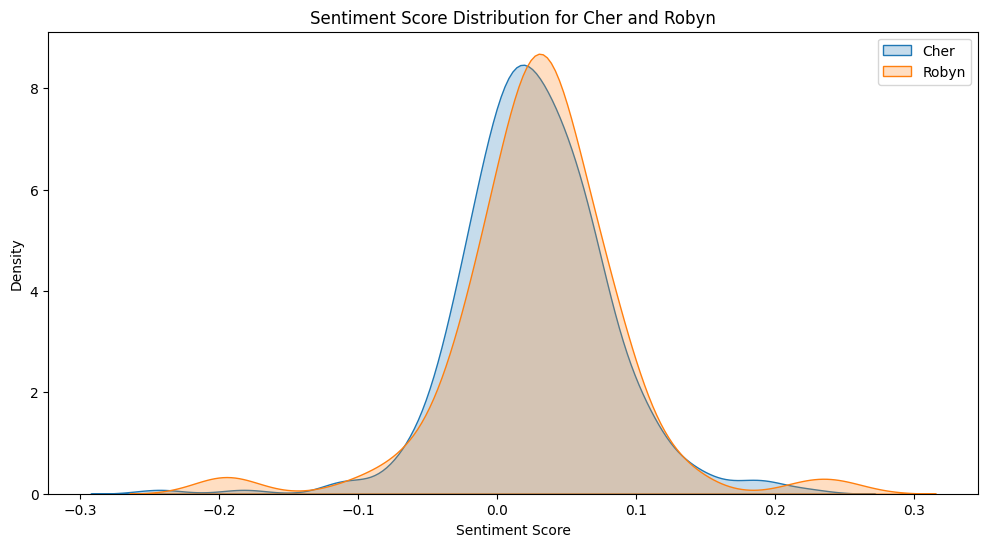

In [13]:
# Helped by Chatgpt to plot the distributions 
# Set up the figure
plt.figure(figsize=(12, 6))

# Kernel density plot for both artists
sns.kdeplot(df[df['artist'] == 'cher']['score'], label='Cher', shade=True)
sns.kdeplot(df[df['artist'] == 'robyn']['score'], label='Robyn', shade=True)

# Add title and labels
plt.title('Sentiment Score Distribution for Cher and Robyn')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')

plt.legend()
plt.show()

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [14]:
# Define emojis
positive_emojis = {
    "😀": 1,
    "😍": 1,
    "😊": 1,
    "😎": 1,
    "🎉": 1,
    "❤️": 1,
    "🥳": 1,
    "💫": 1,
    "🌟": 1,
    "🥰": 1
}
negative_emojis = {
    "😡": -1,
    "😢": -1,
    "😠": -1,
    "💔": -1,
    "😞": -1,
    "💀": -1,
    "😭": -1,
    "👎": -1,
    "😨": -1,
    "🤬": -1
}
emojis = {**positive_emojis, **negative_emojis}

In [15]:
# Similar to bing_liu_score function
# If character is a positive emoji it adds 1 to score and also adds 1 to that emoji
# , and if it is negative it substracts 1 and also substracts 1 to that emoji
# The function returns the score, the positive emoji count and the negative emoji count 
def emoji_bing_score(text):
    score = 0
    pos_count = Counter()
    neg_count = Counter()
    for char in text:
        if char in positive_emojis:
            score += 1
            pos_count[char] += 1
        elif char in negative_emojis:
            score -= 1
            neg_count[char] += 1
    return score, pos_count, neg_count

In [16]:
# Calculate sentiment score for each artist using the function on the descriptions
for artist, descriptions in artist_descriptions.items():

    artist_score = 0
    artist_pos_emoji = Counter()
    artist_neg_emoji = Counter()
    for description in descriptions:
        # Call bing function
        score, pos_count, neg_count = emoji_bing_score(description)
        # Update values
        artist_score += score
        artist_pos_emoji.update(pos_count)
        artist_neg_emoji.update(neg_count)

    print(f"{artist} has an average sentiment of {artist_score/len(descriptions)}, \
          the most popular positive emoji is {artist_pos_emoji.most_common(1)} \
          and the most negative is {artist_neg_emoji.most_common(1)}")

cher has an average sentiment of 0.014220498998843447,           the most popular positive emoji is [('😍', 8205)]           and the most negative is [('💀', 1837)]
robynkonichiwa has an average sentiment of 0.006518263436231706,           the most popular positive emoji is [('💫', 281)]           and the most negative is [('💀', 129)]


Q: What is the average sentiment of your two artists? 

A: Cher has an average of 0.0142 and Robyn has an average of 0.0065. Both are positive, but Cher wins in this metric.

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: Cher has 😍 as the most popular positive emoji, and Robyn has 💫, both of them have 💀 as the most popular negative emoji.

